SVM - mean accuracies (std) 
 cat (specificity): 0.858333 (0.068971) 
 dog (recall): 0.761538 (0.081226) 
 overall: 0.808000 (0.063372) 

LogReg - mean accuracies (std) 
 cat (specificity): 0.806250 (0.084651) 
 dog (recall): 0.717308 (0.078139) 
 overall: 0.760000 (0.062929) 

RF - mean accuracies (std) 
 cat (specificity): 0.772917 (0.079577) 
 dog (recall): 0.759615 (0.086752) 
 overall: 0.766000 (0.064529) 

About 43.48 percent of mislabels by the SVM is shared by all models.
About 41.67 percent of mislabels by the LogReg is shared by all models.
About 40.0 percent of mislabels by the RF is shared by all models.


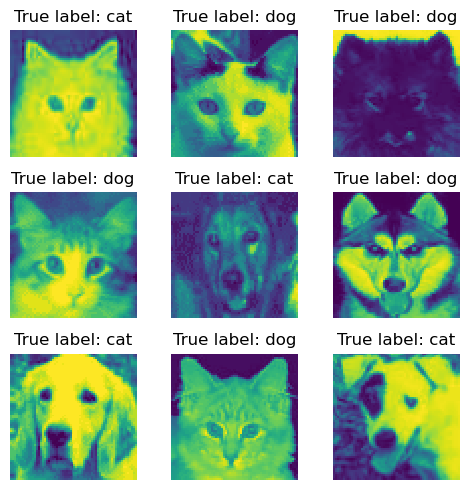

Fraction of missclassified dogs: 0.600000
Fraction of missclassified cats: 0.400000 
(according to algorithm)


In [11]:
import ipynb.fs.full.q1a as q1a

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.svm import SVC

def read_data_file(filename: str) -> pd.DataFrame:
    path = Path(os.getcwd() + 'q1a.ipynb')
    data_folder = str(path.parent.absolute()) + '/data/'
    return pd.read_csv(data_folder + filename)


features = read_data_file('CATSnDOGS.csv') / 255
labels = read_data_file('Labels.csv')

features_cpy = features.copy()
df = features_cpy.join(labels['x'].copy())

cat_features = df[df.x == 0]
cat_subset = cat_features.sample(frac=0.5)
cat_labels = cat_subset.pop('x')

features = features.drop(cat_subset.index, axis=0)
labels = labels.drop(cat_subset.index, axis=0)

150
48


In [ ]:
subset_means = KMeans(n_clusters=2).fit(cat_features)
subset_cluster_labels = subset_means.labels_

model = ['SVM', SVC()]
tuned_model = q1a.tune_ensemble(q1a.reset(model), cat_subset, pd.DataFrame(subset_cluster_labels))
iter = 1
for i in range(iter):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, stratify=labels, random_state=None)

result = q1a.evaluate_ensemble(tuned_model, cat_subset, pd.DataFrame(subset_cluster_labels))
scores = q1a.calc_scores(result)

mean, std = q1a.average_scores(tuned_model, cat_subset, pd.DataFrame(subset_cluster_labels), iter=20)

# Does learning cat cluster labels identify characteristics in the data that separate cats from dogs?